**<span style='color: Blue; font-size: 36px; text-align: centre;'>Film Analysis (2010 - 2019)</span>**
***
> **By Wilkins Nzioka**

Analyzing the IMDb dataset provides a fascinating glimpse into the world of cinema and television, offering insights into the evolving landscape of the entertainment industry.

<img src="movie.gif" alt="Alt text" title="Title text" />

Exploring this dataset opens doors to various facets of film and television, from tracking the rise and fall of genres over time to understanding the factors influencing the success of a production. Whether it's delving into audience preferences, uncovering industry trends, or identifying the finest works of art, the IMDb dataset provides a treasure trove of information that paves the way for comprehensive analysis and deepening our appreciation of the world of visual storytelling.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

## 1. Data Wrangling

In [2]:
#read the dataset and output the first rows
df = pd.read_csv('title.basics.csv')
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [3]:
#read the 2nd dataset and output the first rows
df2 = pd.read_csv('title.ratings.csv')
df2.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [5]:
df.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [7]:
df2.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [8]:
#merge the datasets using('tconst')
df_merged = pd.merge(df, df2, on = ["tconst", "tconst"])

In [9]:
df_merged.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [10]:
print("The shape of the dataset is: {} rows and {} columns".format(df_merged.shape[0], df_merged.shape[1]))

The shape of the dataset is: 73856 rows and 8 columns


In [11]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [12]:
df_merged.describe(include=[np.number]) #include only numeric columns

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


## 2. Data cleaning

In [13]:
#check for dublicate values
df_merged.isna().sum()

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [14]:
#percentage of the null values
def percentage_of_null_values(df_merged):
    total_cells = df_merged.size  # Total number of cells
    missing_cells = df_merged.isnull().sum()  # Total number of missing cells
    percentage_null = (missing_cells / total_cells) * 100
    return percentage_null

# df is your DataFrame
percentage_null = percentage_of_null_values(df_merged)
print("Percentage of null values:")
print(percentage_null.apply(lambda x: f"{x:.2f}%"))

Percentage of null values:
tconst             0.00%
primary_title      0.00%
original_title     0.00%
start_year         0.00%
runtime_minutes    1.29%
genres             0.14%
averagerating      0.00%
numvotes           0.00%
dtype: object


In [15]:
#replace runtime minutes null values with the mean
df_merged['runtime_minutes'].fillna((df_merged['runtime_minutes'].mean()), inplace=True)

In [16]:
#confirm the NaN values have been replaced
df_merged['runtime_minutes'].isna().sum()

0

In [17]:
#delete rows that have NaN value on the genre column
df_merged.dropna(subset=['genres'], inplace=True)

In [18]:
#confirm the NaN values have been deleted
df_merged['genres'].isna().sum()

0

In [19]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73052 non-null  object 
 1   primary_title    73052 non-null  object 
 2   original_title   73052 non-null  object 
 3   start_year       73052 non-null  int64  
 4   runtime_minutes  73052 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73052 non-null  float64
 7   numvotes         73052 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.0+ MB


In [20]:
#check if there are any duplicates
df_merged.duplicated().sum()

0

In [21]:
#split the genres column
df_merged[['genre', 'genre2', 'genre3']] = df_merged['genres'].str.split(',', expand=True)

In [22]:
#drop unwanted columns
df_merged = df_merged.drop(columns = ['tconst', 'original_title'])

In [23]:
df_merged.head()

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre,genre2,genre3
0,Sunghursh,2013,175.00000,"Action,Crime,Drama",7.0,77,Action,Crime,Drama
1,One Day Before the Rainy Season,2019,114.00000,"Biography,Drama",7.2,43,Biography,Drama,None
2,The Other Side of the Wind,2018,122.00000,Drama,6.9,4517,Drama,None,None
3,Sabse Bada Sukh,2018,94.65404,"Comedy,Drama",6.1,13,Comedy,Drama,None
4,The Wandering Soap Opera,2017,80.00000,"Comedy,Drama,Fantasy",6.5,119,Comedy,Drama,Fantasy


In [24]:
df_merged.runtime_minutes.max()

51420.0

In [25]:
#drop outliers rows
df_merged = df_merged[df_merged['runtime_minutes'] != 51420.0]

In [26]:
#drop outliers rows
df_merged = df_merged[df_merged['runtime_minutes'] != 14400.0]

In [27]:
#Import the 3rd dataset
df3 = pd.read_csv('bom.movie_gross.csv')
df3.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [29]:
df3.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [30]:
#drop foreign_gross column
df3 = df3.drop(columns = 'foreign_gross')

In [31]:
#check for duplicate values
df3.duplicated().sum()

0

In [32]:
#replace null values for domestic_gross with mean
df3['domestic_gross'].fillna((df3['domestic_gross'].mean()), inplace=True)

In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 106.0+ KB


In [34]:
#delete rows that have NaN value on the studio column
df3.dropna(subset=['studio'], inplace=True)

In [35]:
#check if the null values have been dropped
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   year            3382 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.1+ KB


In [36]:
#store the cleaned data
df_clean = df_merged.to_csv('clean_imdb_data.csv', index=False)
df_clean2 = df2.to_csv('clean_imdb_data_2.csv', index=False)

## 3. Exploratory Data Analysis & Visualization

### 3.1 Distribution of Movie Released by Year

In [37]:
#movie distribution by year
year_dist = pd.DataFrame(df_merged.start_year.value_counts().reset_index(name='Num_of_movies'))
year_dist

,index,Num_of_movies
0,2017,8638
1,2016,8613
2,2015,8405
3,2014,8269
4,2013,7905
5,2012,7601
6,2018,7476
7,2011,7273
8,2010,6701
9,2019,2169


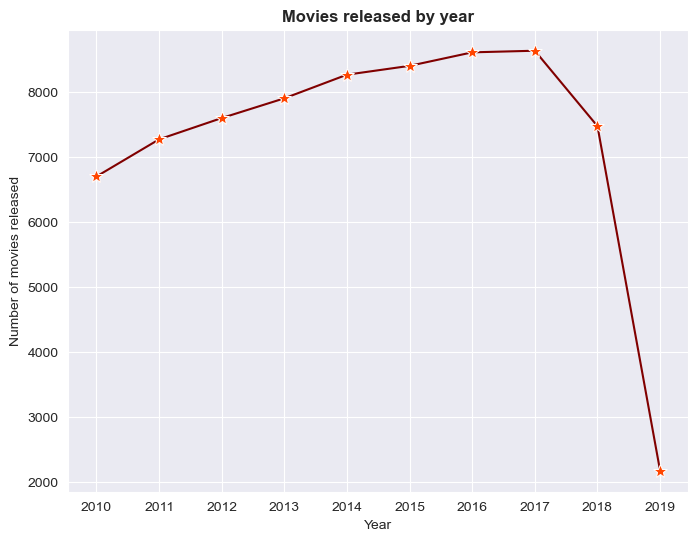

In [80]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
ax = sns.lineplot(data=year_dist, x="index", y="Num_of_movies", 
                  color = 'maroon', 
                  marker='*', markerfacecolor='orangered', markersize=10)
ax.set(xlabel = 'Year',ylabel = 'Number of movies released')
ax.set_xticks(year_dist['index'])  
plt.title('Movies released by year', fontweight='bold')
# Save the chart as a PNG file
plt.savefig("Movies_by_year.png", transparent=True)
plt.show();

### 3.2 How is the Distribution of Genres?

In [39]:
#common genres
df_genres = pd.DataFrame(df_merged.genre.value_counts().reset_index()
df_genres.columns = ['Genre', 'Count']  # Rename columns for clarity
df_genres.head()

,Genre,Count
0,Drama,18572
1,Comedy,14649
2,Documentary,13960
3,Action,6988
4,Horror,4490


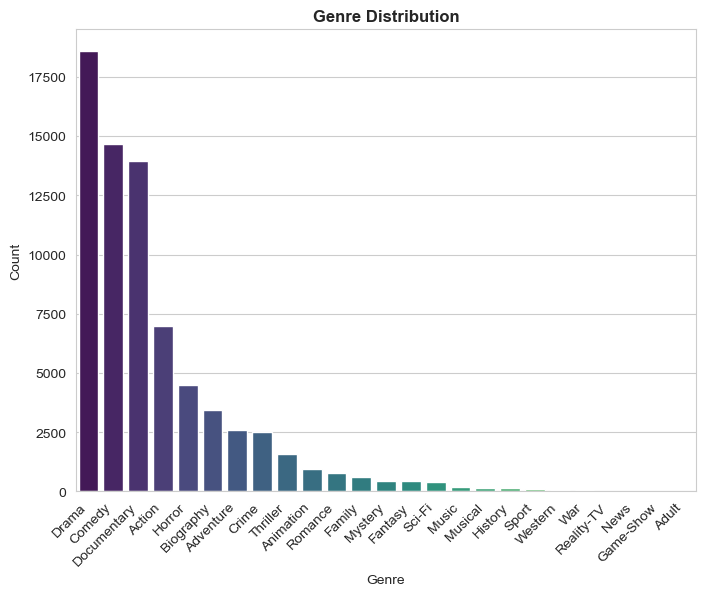

In [40]:
# Create a bar graph using Seaborn
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.barplot(data=df_genres, x='Genre', y='Count', palette='viridis')
plt.title('Genre Distribution',  fontweight='bold')
plt.xlabel('Genre')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha = 'right')
plt.show();

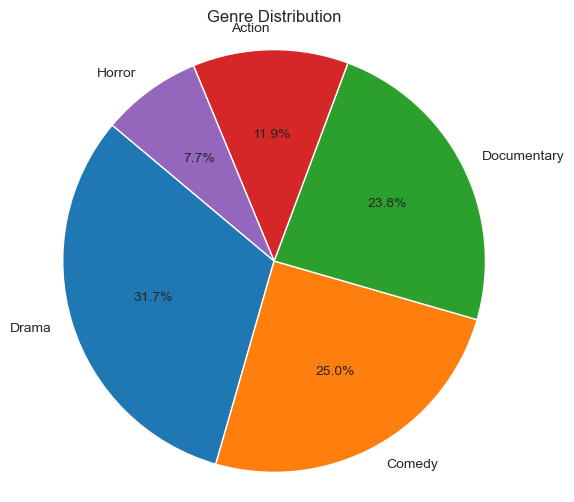

In [78]:
#top 5 genres
top_5_genres = df_merged.genre.value_counts()[:5]
# Create a pie plot
plt.figure(figsize=(6,6)) 
sns.set_style("whitegrid") 

# Create the pie plot
plt.pie(top_5_genres, labels=top_5_genres.index, autopct='%1.1f%%', startangle=140)

plt.title("Genre Distribution")  # Set the title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.



# Show the plot
plt.show()

### 3.3 How's the correlation between movie runtime and number of votes?

In [41]:
df_merged.sample(1)

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre,genre2,genre3
51046,Amar Akbar Anthony,2015,140.0,"Comedy,Crime",6.5,1856,Comedy,Crime,None


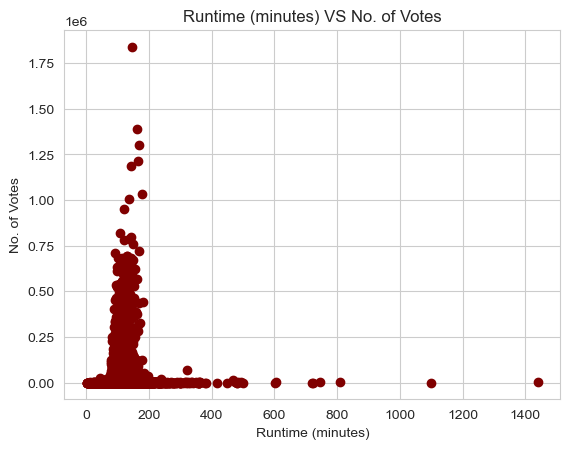

In [42]:
plt.scatter(df_merged['runtime_minutes'],df_merged['numvotes'], color='maroon')
plt.title('Runtime (minutes) VS No. of Votes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('No. of Votes')
plt.show()

### 3.4 How's the correlation between movie runtime and average rating?

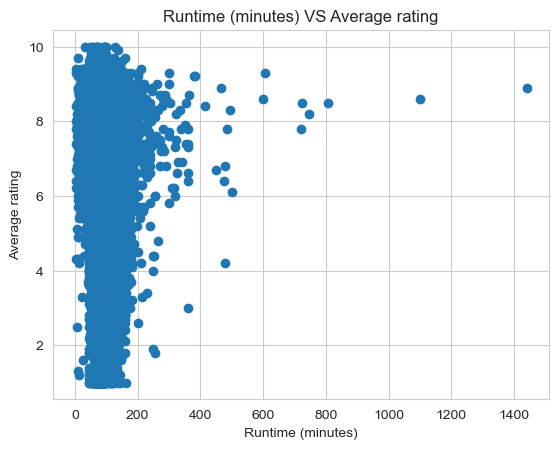

In [43]:
plt.scatter(df_merged['runtime_minutes'],df_merged['averagerating'])
plt.title('Runtime (minutes) VS Average rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average rating')
plt.show()

### 3.5 How's the distribution between movie genre and number of votes?

In [44]:
df_genre_votes = df_merged.groupby('genre')['numvotes'].sum().reset_index()
df_genre_votes = df_genre_votes.sort_values(by='numvotes', ascending=False)# Sort the DataFrame by 'numvotes' in descending order
df_genre_votes = df_genre_votes.loc[:10]
df_genre_votes

,genre,numvotes
0,Action,101161682
8,Drama,40837231
5,Comedy,40041881
2,Adventure,27049347
4,Biography,17802454
6,Crime,13186709
13,Horror,10635982
7,Documentary,2974314
16,Mystery,2379573
3,Animation,1949018


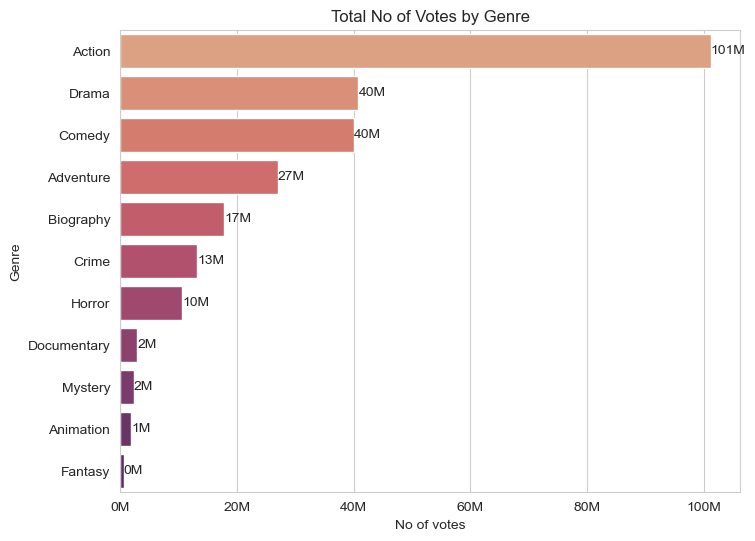

In [45]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
barplot = sns.barplot(data=df_genre_votes, x='numvotes', y='genre', palette='flare')

plt.title('Total No of Votes by Genre')
plt.xlabel('No of votes')
plt.ylabel('Genre')
# Format x-axis tick labels to display values in millions
def millions_formatter(x, pos):
    return f'{x/1e6:.0f}M'

# Create a FuncFormatter and apply it to the x-axis
millions_format = FuncFormatter(millions_formatter)
plt.gca().xaxis.set_major_formatter(millions_format)

# Add data labels on the bars
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_width() / 1e6):,}M', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=10)

plt.show()

### 3.5 How's the distribution between movie genre and average rating?

In [46]:
df_genre_avgrate = df_merged.groupby('genre')['averagerating'].mean().reset_index()
df_genre_avgrate = df_genre_avgrate.sort_values(by='averagerating', ascending=False)# Sort the DataFrame by 'numvotes' in descending order
df_genre_avgrate = df_genre_avgrate.loc[:10]
df_genre_avgrate

,genre,averagerating
11,Game-Show,9.000000
14,Music,7.506771
7,Documentary,7.316841
4,Biography,7.174512
21,Sport,6.944944
15,Musical,6.637255
12,History,6.413235
2,Adventure,6.386710
8,Drama,6.370563
3,Animation,6.252391


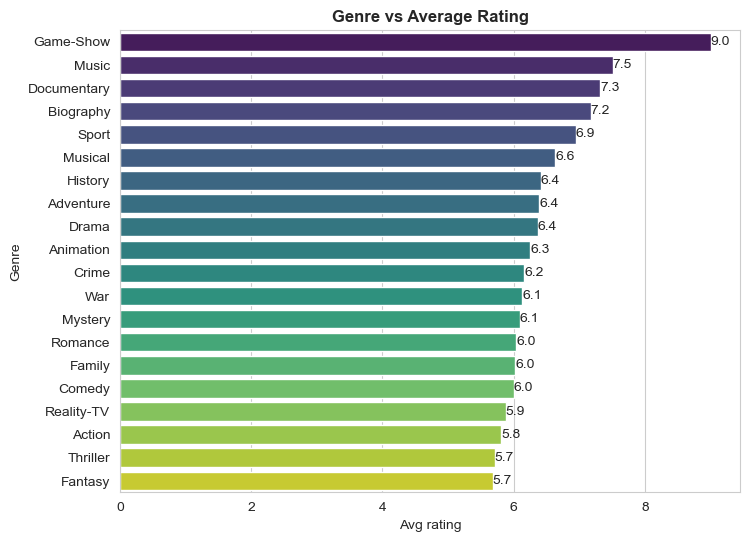

In [47]:
# Create a bar graph using Seaborn
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
barplot = sns.barplot(data=df_genre_avgrate, y='genre', x='averagerating', palette='viridis')
plt.title('Genre vs Average Rating',  fontweight='bold')
plt.ylabel('Genre')
plt.xlabel('Avg rating')

# Rotate x-axis labels for better readability
#plt.xticks(rotation=45, ha = 'right')

# Add data labels with one decimal place
for p in barplot.patches:
    label = f'{p.get_width():.1f}'  # Format the label to one decimal place
    plt.annotate(label, (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=10)

plt.show();

### 3.6 Top 20 Movies by Average rating

In [48]:
df_merged.sample(1)

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre,genre2,genre3
67789,The Meek,2017,99.0,Action,5.4,10,Action,None,None


In [60]:
df_top_rating = df_merged[['primary_title', 'genres', 'averagerating', 'runtime_minutes', 'start_year']]
df_top_rating = df_top_rating.sort_values(by='averagerating', ascending=False).reset_index(drop=True)[:20]
df_top_rating

,primary_title,genres,averagerating,runtime_minutes,start_year
0,Freeing Bernie Baran,"Crime,Documentary",10.0,100.00000,2010
1,Dog Days in the Heartland,Drama,10.0,94.65404,2017
2,All Around Us,Documentary,10.0,94.65404,2019
3,The Paternal Bond: Barbary Macaques,Documentary,10.0,59.00000,2015
4,Revolution Food,Documentary,10.0,70.00000,2015
5,Exteriores: Mulheres Brasileiras na Diplomacia,Documentary,10.0,52.00000,2018
6,Fly High: Story of the Disc Dog,Documentary,10.0,65.00000,2019
7,Requiem voor een Boom,Documentary,10.0,48.00000,2016
8,The Dark Knight: The Ballad of the N Word,"Comedy,Drama",10.0,129.00000,2018
9,I Was Born Yesterday!,Documentary,10.0,31.00000,2015


In [50]:
gross_stats = df3['domestic_gross'].describe()
mode_gross = df3['domestic_gross'].mode().iloc[0]
# Calculate the range
range_gross = df3['domestic_gross'].max() - df3['domestic_gross'].min()
# Print the results
print('Statistical summary for the domestic gross: ')
print()
print(f'Mean Gross Earnings: ${gross_stats["mean"]:.2f}')
print(f'Median Gross Earnings: ${gross_stats["50%"]:.2f}')
print(f'Mode Gross Earnings: ${mode_gross:.2f}')
print(f'Standard Deviation: ${gross_stats["std"]:.2f}')
print(f'Minimum Gross Earnings: ${gross_stats["min"]:.2f}')
print(f'Maximum Gross Earnings: ${gross_stats["max"]:.2f}')
print(f'Range: ${range_gross:.2f}')

Statistical summary for the domestic gross: 

Mean Gross Earnings: $28771292.42
Median Gross Earnings: $1400000.00
Mode Gross Earnings: $1100000.00
Standard Deviation: $66748803.12
Minimum Gross Earnings: $100.00
Maximum Gross Earnings: $936700000.00
Range: $936699900.00


In [64]:
#Top Movies by domestic gross
df_top_gross = df3[['title', 'domestic_gross', 'year']]
df_top_gross = df_top_gross.sort_values(by='domestic_gross', ascending=False).reset_index(drop=True)[:5]
df_top_gross

,title,domestic_gross,year
0,Star Wars: The Force Awakens,936700000.0,2015
1,Black Panther,700100000.0,2018
2,Avengers: Infinity War,678800000.0,2018
3,Jurassic World,652300000.0,2015
4,Marvel's The Avengers,623400000.0,2012


In [63]:
df3.sample(1)

,title,studio,domestic_gross,year
1929,Seventh Son,Uni.,17200000.0,2015


In [65]:
df_top_gross.to_excel('top_gross.xlsx')

### 3.7 Total Domestic Gross Distribution by Year

In [52]:
#movie distribution by year
year_dist_2 = df3.groupby('year')['domestic_gross'].sum().reset_index()
year_dist_2

,year,domestic_gross
0,2010,1.030056e+10
1,2011,1.012158e+10
2,2012,1.104908e+10
3,2013,1.093606e+10
4,2014,1.045271e+10
5,2015,1.108015e+10
6,2016,1.133989e+10
7,2017,1.093327e+10
8,2018,1.109121e+10


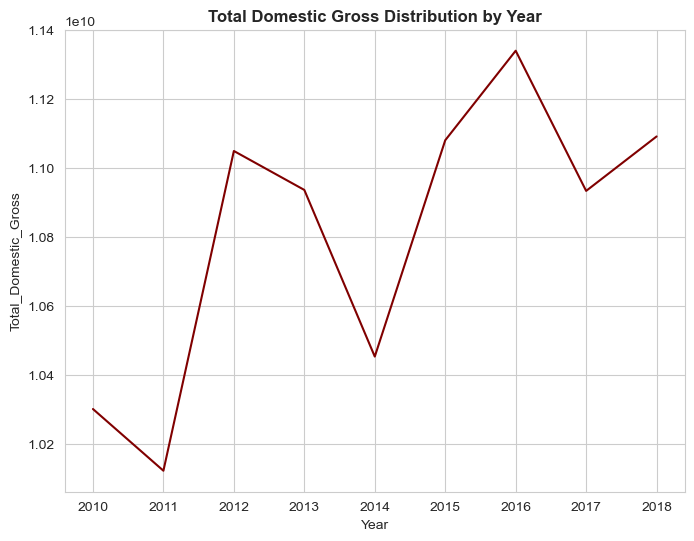

In [53]:
plt.figure(figsize=(8,6))
ax = sns.lineplot(data=year_dist_2, x="year", y="domestic_gross", color = 'maroon')
ax.set(xlabel = 'Year', ylabel = 'Total_Domestic_Gross')  
plt.title('Total Domestic Gross Distribution by Year', fontweight='bold')
plt.show();

### 3.8 Top 10 Studios by releases

In [54]:
df_studios = pd.DataFrame(df3.studio.value_counts().reset_index())[:10]
df_studios.columns = ['Studio', 'Total']  # Rename columns for clarity
df_studios

,Studio,Total
0,IFC,166
1,Uni.,147
2,WB,140
3,Fox,136
4,Magn.,136
5,SPC,123
6,Sony,110
7,BV,106
8,LGF,103
9,Par.,101


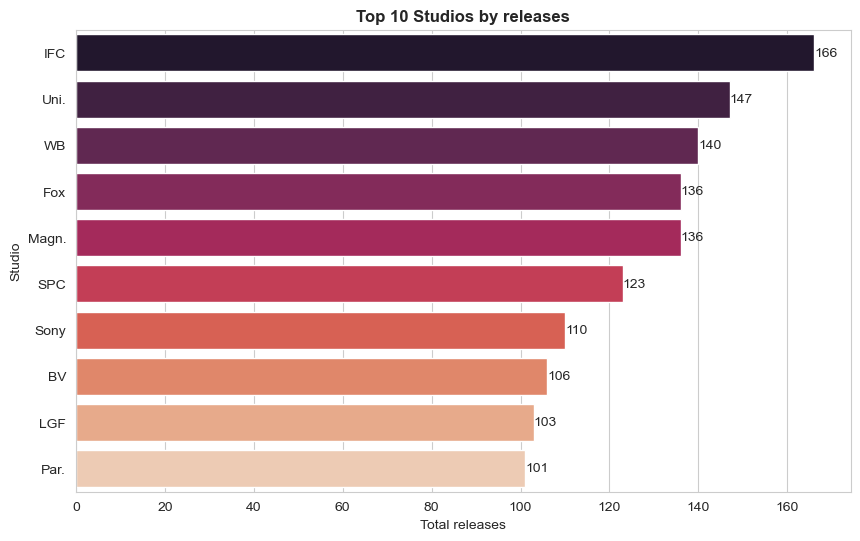

In [55]:
# Create a bar graph using Seaborn
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
barplot = sns.barplot(data=df_studios, y='Studio', x='Total', palette='rocket')
plt.title('Top 10 Studios by releases',  fontweight='bold')
plt.xlabel('Total releases')
plt.ylabel('Studio')

# Rotate x-axis labels for better readability
#plt.xticks(rotation=45, ha = 'right')

#  Add data labels to the bars
for p in barplot.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{int(width)}', ha='left', va='center', fontsize=10)

plt.show();

### 3.9 Wordcloud of the Movies' Titles

In [56]:
#wordcloud
titles = df_merged['primary_title'].astype(str)

# Join all titles into a single string
all_titles = ' '.join(titles)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

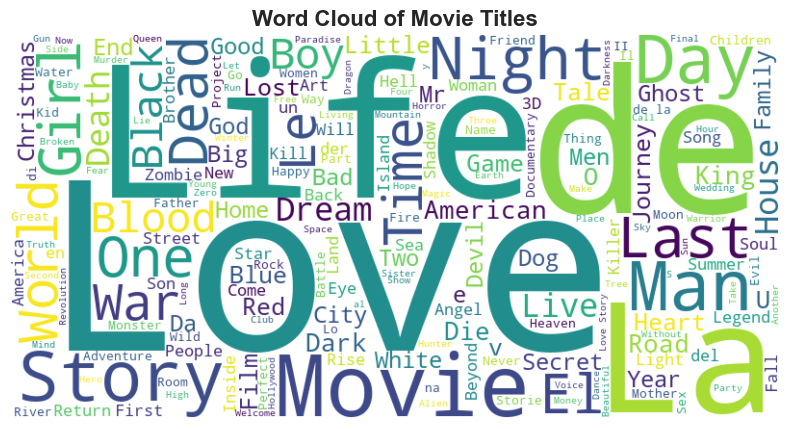

In [57]:
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Movie Titles", fontsize=16, fontweight='bold')
plt.show()

In [82]:
# Save the image in the img folder:
wordcloud.to_file("WordCloud_of_Titles.png")